In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df=pd.read_csv('OneDrive/Desktop/learnbay/csv file/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
df.shape

(1143, 13)

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
df.drop(columns='Id',inplace=True)

In [9]:
ave_qu = df.groupby("quality").mean()
ave_qu

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500


<AxesSubplot:xlabel='quality'>

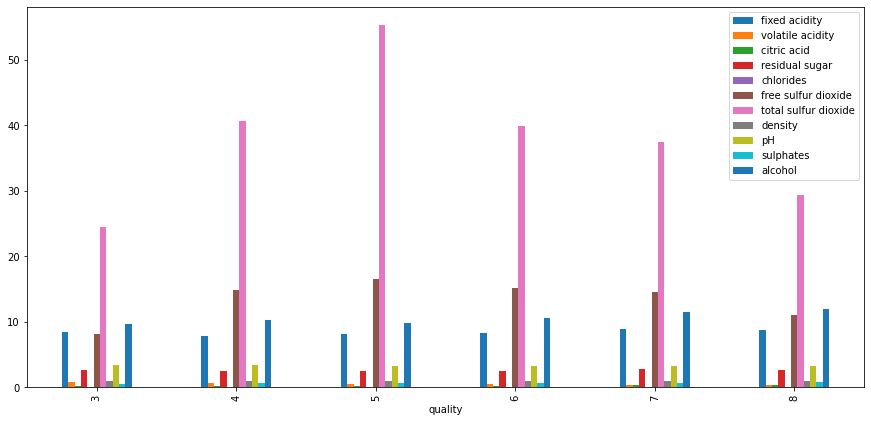

In [10]:
ave_qu.plot(kind='bar',figsize=(15,7))

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

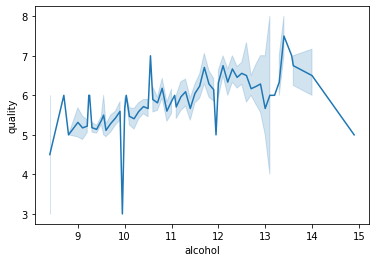

In [11]:
sns.lineplot(x='alcohol',y='quality',data=df)

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np  
import pandas as pd

# Train Test Split

In [13]:
X=df.iloc[:,:-1].values
y=df.iloc[:,11].values

In [14]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [15]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier 

In [17]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

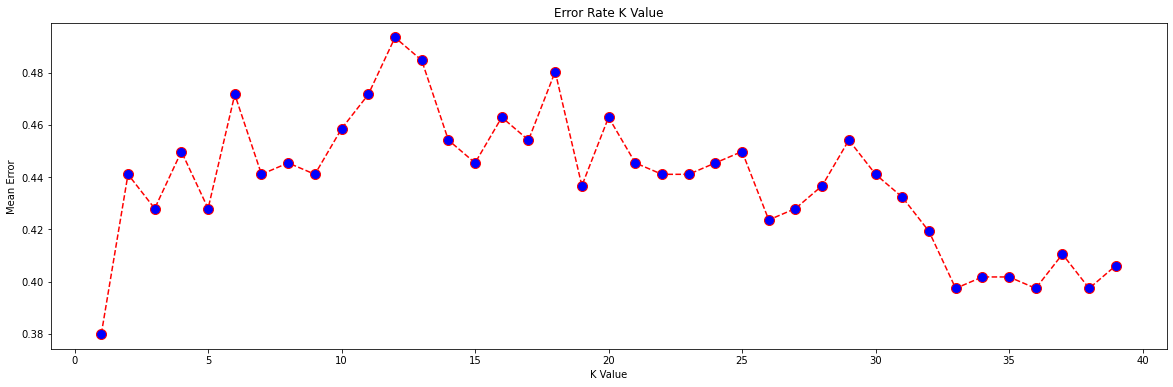

In [18]:
plt.figure(figsize=(20, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [19]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 0  0  1  0  0  0]
 [ 0  0  3  2  0  0]
 [ 0  0 65 31  2  0]
 [ 0  0 34 60 10  0]
 [ 0  0  6  6  6  0]
 [ 0  0  0  2  1  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.60      0.66      0.63        98
           6       0.59      0.58      0.59       104
           7       0.32      0.33      0.32        18
           8       0.00      0.00      0.00         3

    accuracy                           0.57       229
   macro avg       0.25      0.26      0.26       229
weighted avg       0.55      0.57      0.56       229



C:\Users\ayans\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [23]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


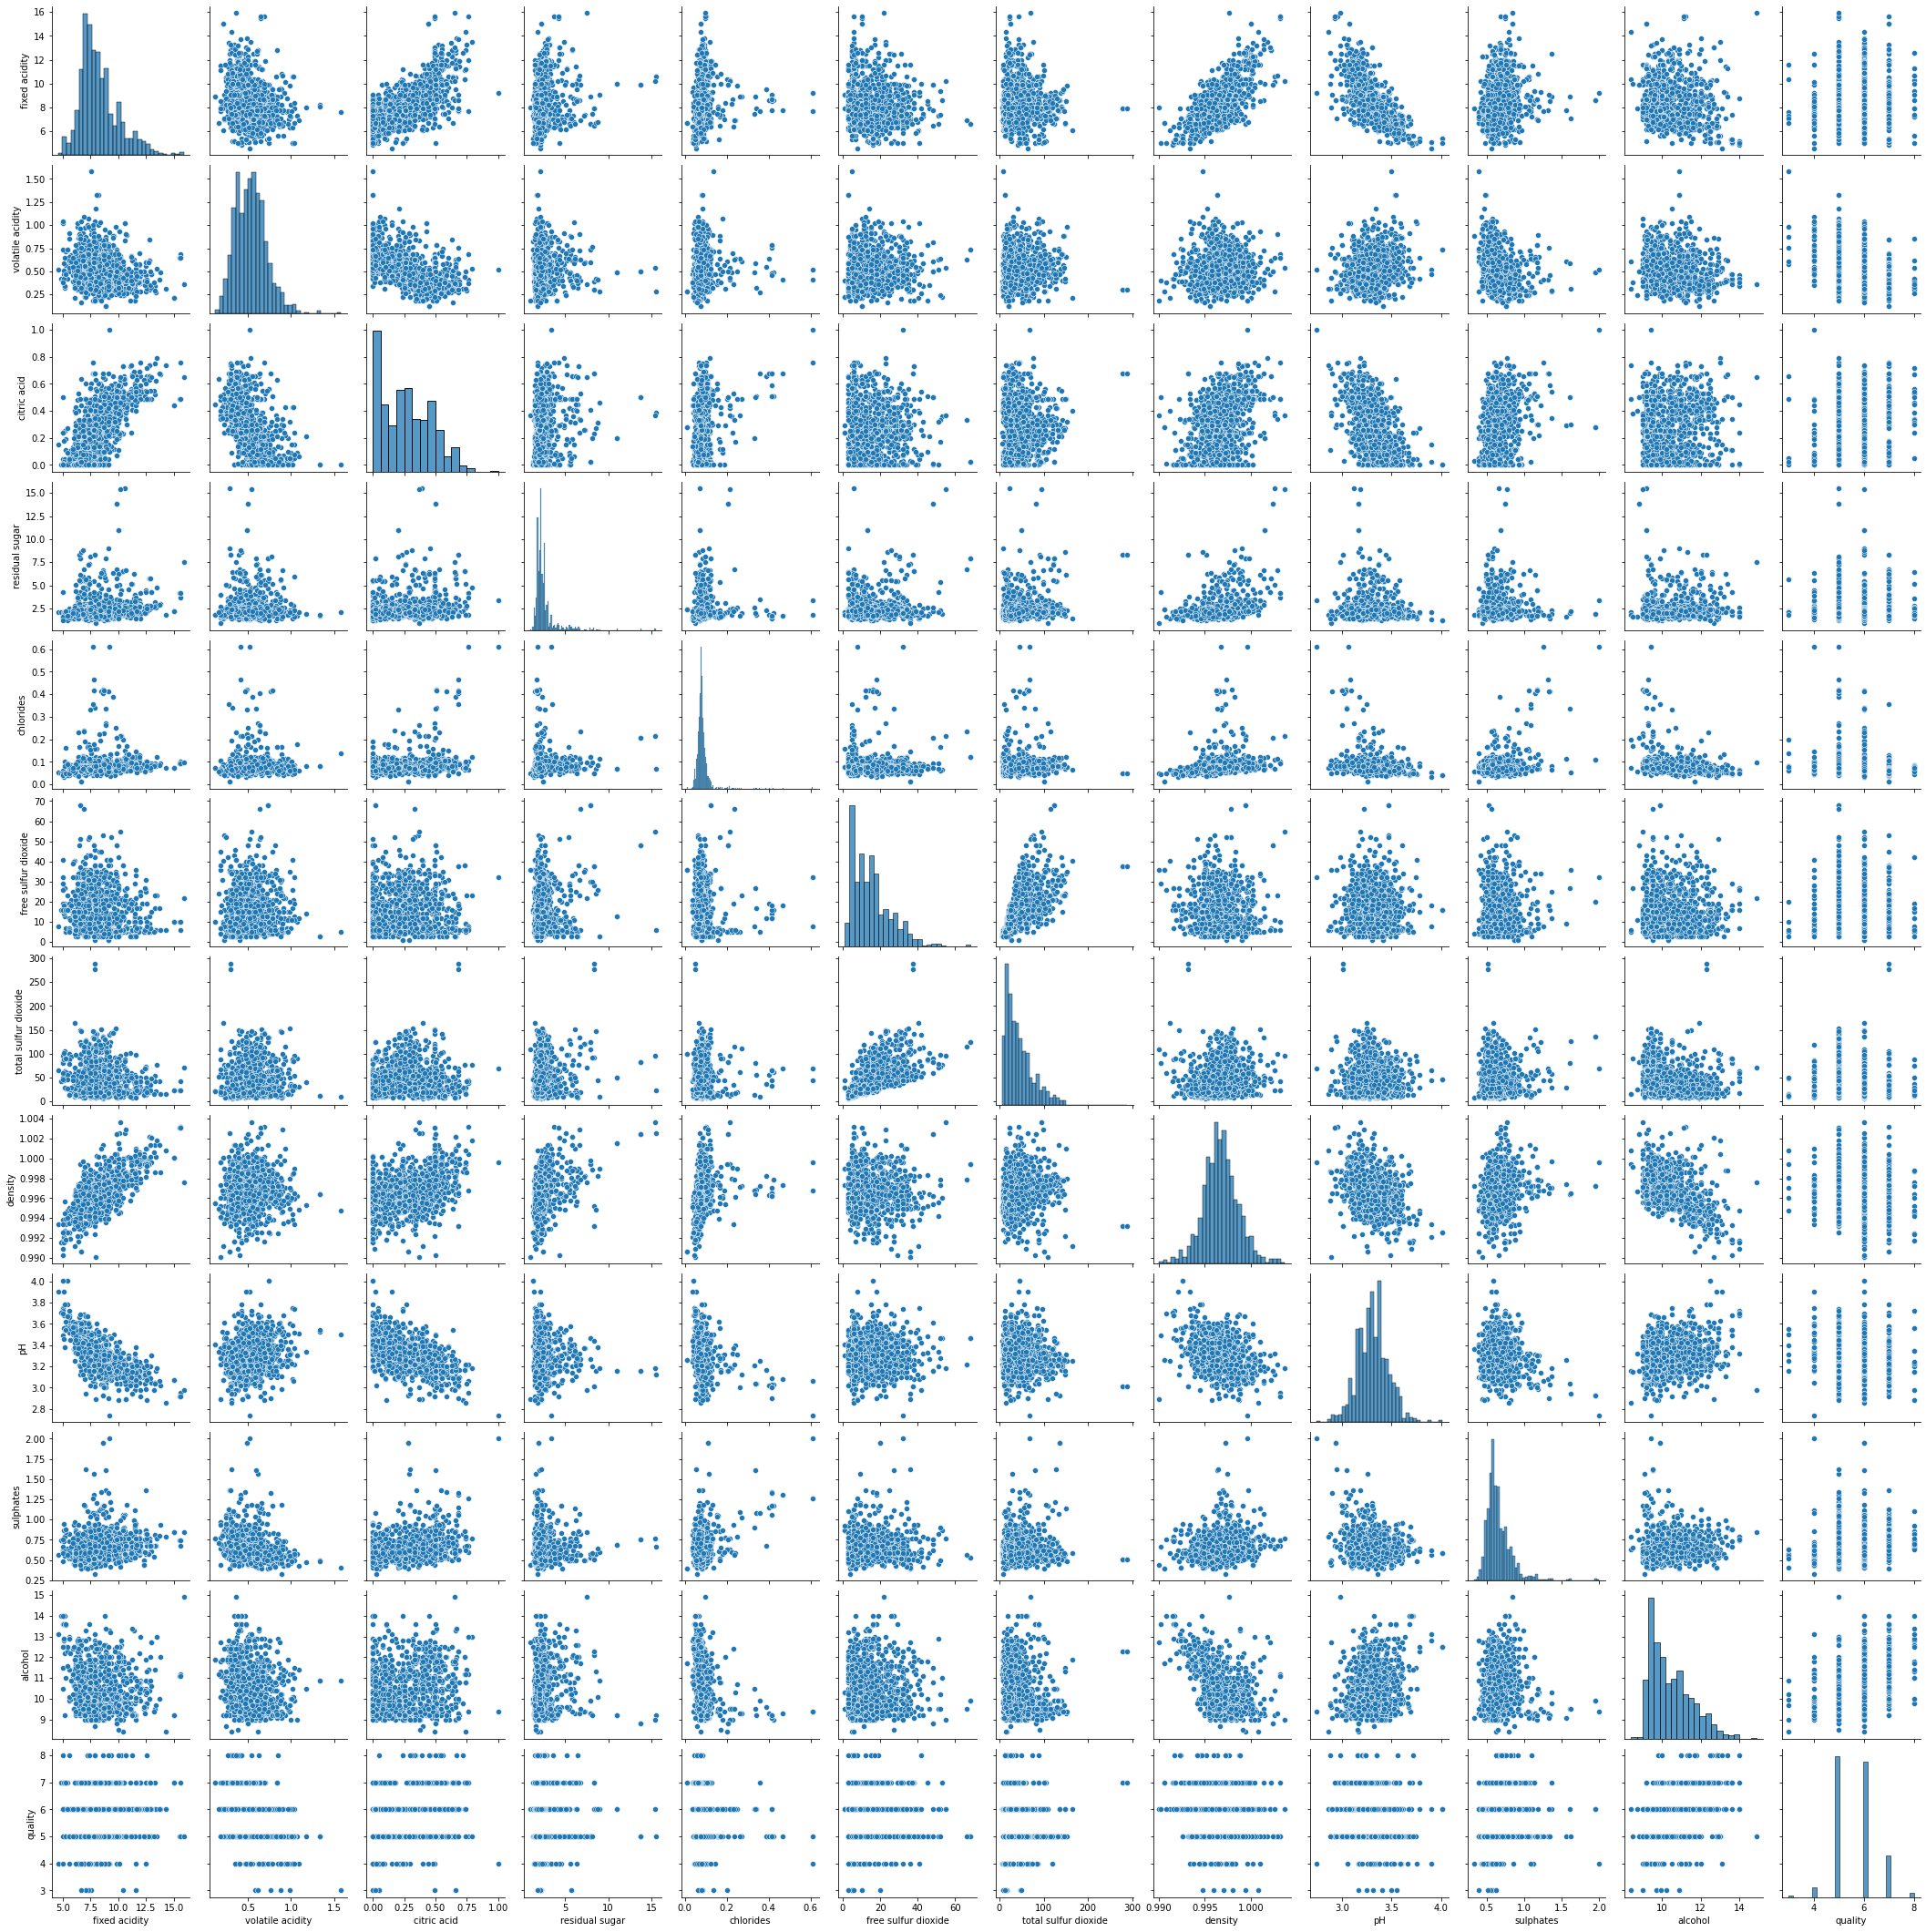

In [24]:
sns.pairplot(data=df)

In [25]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

data=df.apply(lambda x : outlier_cap(x))

In [26]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_data=scaler.fit_transform(data)

data_wine=pd.DataFrame(scaled_data)

In [27]:
X=data_wine.iloc[:,:-1].values
y=data_wine.iloc[:,11].values

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [29]:
lm = LinearRegression()

In [30]:
lm.fit(X_test,y_test)

LinearRegression()

In [31]:
predictions = lm.predict(X_test)

C:\Users\ayans\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

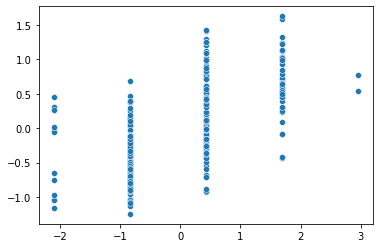

In [32]:
sns.scatterplot(y_test, predictions)

In [33]:
import statsmodels.api as sm

In [34]:
X_endog = sm.add_constant(X_test)

In [35]:
res = sm.OLS(y_test, X_endog)
res.fit()

In [36]:
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     21.10
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           2.49e-32
Time:                        09:05:12   Log-Likelihood:                -381.17
No. Observations:                 343   AIC:                             786.3
Df Residuals:                     331   BIC:                             832.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0446      0.041     -1.093      0.275      -0.125       0.036
x1             0.0588      0.120      0.491      0.624      -0.177       0.294
x2            -0.2252      0.053     -4.271      0.000      -0.329      -0.121
x3            -0.0518      0.074     -0.700      0.485      -0.197       0.094
x4             0.0219      0.055      0.398      0.691      -0.086       0.130
x5            -0.1175      0.053     -2.211      0.028      -0.222      -0.013
x6             0.0788      0.057      1.389      0.166      -0.033       0.190
x7            -0.1412      0.057     -2.469      0.014      -0.254      -0.029
x8            -0.0448      0.109     -0.411      0.681      -0.259       0.170
x9            -0.0710      0.078     -0.907      0.365      -0.225       0.083
x10            0.2353      0.046      5.091      0.000       0.144       0.326
x11            0.3464      0.073      4.772      0.000       0.204       0.489
==============================================================================
Omnibus:                        9.488   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               17.419
Skew:                           0.007   Prob(JB):                     0.000165
Kurtosis:                       4.104   Cond. No.                         7.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
import numpy as np
from sklearn import metrics

print('MAE :', metrics.mean_absolute_error(y_test, predictions))
print('MSE :', metrics.mean_squared_error(y_test, predictions))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE : 0.5591118548739733
MSE : 0.5404656226296071
RMSE : 0.7351636706404956


In [38]:
X_endog_test = sm.add_constant(X_test)
model = res.fit()
predictions = model.predict(X_endog_test)

In [39]:
predictions

array([-0.02855981,  0.07443662,  1.12575514, -0.25982524, -0.65138706,
        0.14957045, -0.61224747, -0.54677184, -0.20767004, -0.71348385,
        0.03470197,  0.61181492, -0.53666867,  0.07810927, -0.63531276,
       -0.13122466, -0.42269022,  0.06851771,  0.24675586, -1.02955483,
        1.23819098,  0.62946012, -0.79307937,  0.71109031, -0.30913434,
       -0.72183945,  0.1317119 , -0.54696018, -0.68191063,  0.74387083,
        0.09688207,  0.02417097, -0.74876828, -0.92609123, -0.72624411,
        0.77906281, -0.20817222, -0.03597882,  0.23031712,  0.0401996 ,
       -0.46580209, -0.88875756,  0.71250465, -0.08930243, -0.13464862,
       -0.56318276,  0.38213147, -0.47179311, -0.593218  ,  1.0280685 ,
       -0.26700418, -0.35936935,  0.91546579, -0.91569371,  0.78786968,
        0.44940636,  0.85974481, -0.16218991, -0.19473319, -1.24428347,
        0.93842668, -0.51188467, -0.58979348, -0.31840504, -0.31696778,
       -0.18499196, -0.09020172,  0.73018537,  0.93066451, -0.85

# Decison Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV

In [62]:
X=df.iloc[:,:-1].values
y=df.iloc[:,11].values

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size =0.2)

In [64]:
# def dtree_grid_search(X,y):
#     #create a dictionary of all values we want to test
#     param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_leaf':np.arange(1,10)}
#     # decision tree model
#     dtree_model=DecisionTreeClassifier()
#     #use gridsearch to test all values
#     dtree_gscv = GridSearchCV(dtree_model, param_grid)
#     #fit model to data
#     dtree_gscv.fit(X, y)
#     return dtree_gscv.best_params_

In [75]:
dtree_model=DecisionTreeClassifier()
param_grid= { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_leaf':np.arange(1,10)}

dtree_gscv=GridSearchCV(dtree_model,param_grid,cv=10)

dtree_gscv.fit(X,y)
dtree_gscv.best_params_

C:\Users\ayans\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 7}

In [84]:
model_dt=DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=7)
model_dt.fit(x_train,y_train)
model.dt_score_train=model_dt.score(x_train,y_train)
print('Training Score',model.dt_score_train)
model_dt_score_test=model_dt.score(x_test,y_test)
print('Test Score',model_dt_score_test)

Training Score 0.5951859956236324
Test Score 0.5458515283842795
